<a href="https://colab.research.google.com/github/tsancode/CDD_ML_NAMPT/blob/main/4_NAMPT_CDD_ML_Regression_Random_Forest_all_pIC50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In **Part 4**, I am building a regression model of NAMPT inhibitors using the random forest algorithm.


*Tsaniyah Nur Kholilah*

inspired from : *Data Professor*

---

## **1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [ ]:
df = pd.read_csv('/content/NAMPT_bioactivity_data_3class_all_pIC50_pubchem_fp.csv')

In [ ]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.829738
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.692504
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.721246
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.886057
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.376751


## **3. Input features**
The ***NAMPT*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2678,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2679,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2680,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.dropna(axis=0, how="all", inplace=True)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2678,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2679,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2680,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0       4.829738
1       4.692504
2       8.721246
3       8.886057
4       8.376751
          ...   
2677    6.709965
2678    7.596879
2679    9.809668
2680    5.136083
2681    5.667562
Name: pIC50, Length: 2682, dtype: float64

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(2682, 881)

In [ ]:
Y.shape

(2682,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(2682, 96)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((2145, 96), (2145,))

In [ ]:
X_test.shape, Y_test.shape

((537, 96), (537,))

## **5. Building a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.38138074376403885

In [ ]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

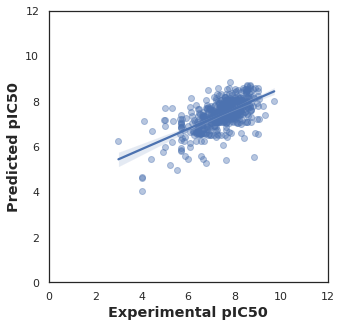

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
plt.savefig('plot_Experimental_vs_Predicted_pIC50_Values.pdf')

<Figure size 432x288 with 0 Axes>